In [1]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (21.9 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [2]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
contents_pd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DX_contents/kr_dx_concat_pre.csv', encoding='utf-8')
contents_pd.columns =['id', 'title', 'url', 'date', 'keyword', 'creator', 'view','likes', 'depart', 'depart1', 'language', 'text', 'new_text','key_words']

In [4]:
contents_pd['depart'].unique()

array(['DXÏù¥Ìï¥', 'DXÌÉúÎèÑ', 'ÏõåÌÅ¨Ïä§ÌÇ¨', 'Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†', 'ÏßÄÎä•ÌôîÍ∏∞Ïà†', 'ÏûêÎèôÌôîÍ∏∞Ïà†', 'Ïª¥Ìì®ÌåÖÍ∏∞Ïà†',
       'ÏµúÏã†Í∏∞Ïà†ÌôúÏö©Ïó≠Îüâ', 'Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò'], dtype=object)

In [96]:
df1=contents_pd[contents_pd['depart']=='Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†']

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer( stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text Ïª¨ÎüºÍ∞íÏúºÎ°ú feature vectorization ÏàòÌñâ
feature_vect = tfidf_vect.fit_transform(df1['key_words'])

In [98]:
from sklearn.cluster import KMeans

# nÍ∞úÏùò ÏßëÌï©ÏúºÎ°ú Íµ∞ÏßëÌôî
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# ÏÜåÏÜç ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º cluster_label Ïª¨Îüº
df1['cluster_label'] = cluster_label
df1.sort_values(by='cluster_label')

id                                              title  \
273  273          MRO Íµ¨Îß§Í∞Ä Ïñ¥Î†§Ïõå?? DBÍ¥ÄÎ¶¨Î∂ÄÌÑ∞ ÏãúÏûëÌï¥! (ÏÑúÎ∏åÏõêÏóêÎäî Ï†ÑÎ¨∏Ï°∞ÏßÅÍπåÏßÄ?)   
263  263         Í¥ÄÍ≥ÑÌòï DBÏóêÏÑú, Ïä§ÌÇ§ÎßàÎ•º ÏÑ§Í≥ÑÌïòÎäî Î≤ï! 5Î∂Ñ ÏàúÏÇ≠ | ÎîîÎ™®Ïùò 5Î∂Ñ ÏΩîÎî©ÏÉÅÏãù   
264  264                   DB ÌÖåÏù¥Î∏î ÏÑ§Í≥Ñ ÏûòÎ™ªÌïòÎ©¥ Ïñ¥Îñ§ Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∏ Ïàò ÏûàÏùÑÍπåÏöî?   
266  266                          Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ 08. Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑ§Í≥Ñ Î∞è Íµ¨Ï∂ï   
268  268  Î∞±ÏóîÎìú Í∞úÎ∞úÏûêÎùºÎ©¥ Î∞òÎìúÏãú ÏïåÏïÑÏïºÌïòÎäî ERDÎ°ú Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑ§Í≥ÑÌï¥Î≥¥Í∏∞ | Í∞úÎ∞ú...   
..   ...                                                ...   
279  279  ÎπÑÏãº Greenhouse, Workable ÎåÄÏã†, Î¨¥Î£å ÏßÄÏõêÏûê Í¥ÄÎ¶¨ ÏãúÏä§ÌÖú (ATS...   
283  283                      [30Ï¥àÏÇ¨Ïö©Î≤ï] Bigquery ÌîºÎ¥á ÌÖåÏù¥Î∏î ÏÇ¨Ïö©ÌïòÍ∏∞   
284  284            BigQuery ÏãúÏûëÌïòÍ∏∞ 1Í∞ï - Introduction | TÏïÑÏπ¥Îç∞ÎØ∏   
257  257                                KNIMEÏùÑ ÌôúÏö©Ìïú Ï§ëÍ≥†Ï∞® ÏòàÏ∏°Î™®Îç∏   
289  289  MSÏóëÏÖÄ Î∞∞ÏõåÏïº ÌïúÎã§Î©¥ Ïï°ÏÖÄ ÏÇ¨Ïö©Ïóê Íº≠ ÌïÑÏöîÌïú 10Í∞ÄÏßÄ Í∏∞Îä• ÎßùÏÑ§Ïù¥ÏßÄ ÎßêÍ≥† ÏßÄÍ∏à Î∞î...   

                                                   url        date  \
273  https://www.youtube.com/watch?v=P7VLuJm5nCY&pp...    2022.8.4   
263  https://www.youtube.com/watch?v=HsGaPadXJXQ&pp...   2020.3.19   
264  https://www.youtube.com/watch?v=JwfQ8ouhAzA&pp...  2022.10.12   
266  https://www.youtube.com/watch?v=vLAhZFDHzio&pp...   2020.9.14   
268  https://www.youtube.com/watch?v=jsOPr3QfMW0&pp...  2022.12.21   
..                                                 ...         ...   
279        https://www.youtube.com/watch?v=Lav_5X9OK0c    2021.4.6   
283  https://www.youtube.com/watch?v=rEOYaVanyew&pp...    2021.6.5   
284  https://www.youtube.com/watch?v=MILy4dzSGk4&pp...   2022.7.21   
257  https://www.youtube.com/watch?v=lW7YQDrS8B0&pp...  2022.12.10   
289  https://www.youtube.com/watch?v=IoHhxyofQnI&t=...   2019.11.2   

                                   keyword            creator     view  likes  \
273                                    #DB             ÏÑúÎ∏åÏõê Ï±ÑÎÑê    17589   17.0   
263                                    #Í∏∞Ï¥à         ÌÖåÌÅ¨Í≥ºÌïô! DiMo    15975    NaN   
264                               Î∞±Î∞úÎ∞±Ï§ë ÏãúÎ¶¨Ï¶à               Ïâ¨Ïö¥ÏΩîÎìú     5666  213.0   
266                            2020 Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§    Jacob's Lecture     6462   62.0   
268                                    NaN               Ìó¨Î°úÏπ¥Ïùº     9917  269.0   
..                                     ...                ...      ...    ...   
279                                    NaN            ÏùºÏûòÎü¨ Ïû•ÌîºÏó†     3733   86.0   
283  Google(Íµ¨Í∏Ä) Workpalce(G Suite) ÏÇ¨Ïö©Î≤ï ÎèÑÏõÄÎßê   Ï°∞ÏΩîÎîîÏùò Íµ¨Í∏Ä Ïä§ÎßàÌä∏ÏõåÌÅ¨ ÏÑ∏ÏÉÅ      121    1.0   
284                          BigQuery ÏãúÏûëÌïòÍ∏∞  SKplanet Tacademy     3842   52.0   
257                                   #Í∞ÄÏ≤úÎåÄ                 HJ       21    1.0   
289                                  Ïª¥Ìì®ÌÑ∞ÍµêÏú°              IB 96  4942065   67.0   

    depart  depart1 language  \
273  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†     DBÏÑ§Í≥Ñ      ÌïúÍµ≠Ïñ¥   
263  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†  Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑùÏÇ¨Î°Ä      ÌïúÍµ≠Ïñ¥   
264  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†     DBÏÑ§Í≥Ñ      ÌïúÍµ≠Ïñ¥   
266  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†     DBÏÑ§Í≥Ñ      ÌïúÍµ≠Ïñ¥   
268  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†     DBÏÑ§Í≥Ñ      ÌïúÍµ≠Ïñ¥   
..     ...      ...      ...   
279  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†     DBÍ¥ÄÎ¶¨      ÌïúÍµ≠Ïñ¥   
283  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†     DBÍ¥ÄÎ¶¨      ÌïúÍµ≠Ïñ¥   
284  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†     DBÍ¥ÄÎ¶¨      ÌïúÍµ≠Ïñ¥   
257  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†   Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑù       ÌïúÍµ≠Ïñ¥   
289  Îç∞Ïù¥ÌÑ∞Í∏∞Ïà†       DB      ÌïúÍµ≠Ïñ¥   

                                                  text  \
273  #MRO #Íµ¨Îß§ Ï†ÑÎ¨∏Í∞Ä #ÏÑúÎ∏åÏõêÏù¥ ÏïåÎ†§Ï£ºÎäî ‚ú®MRO ÌÅ¥ÎûòÏì∞‚ú®\nMROÍµ¨Îß§, Ïñ¥Îñ§ Í≤É...   
263  Í¥ÄÍ≥ÑÌòï DBÏùò Íµ¨Ï°∞ÏôÄ Ï†úÏïΩÏ°∞Í±¥ÏùÑ ÏÑ§Í≥ÑÌïòÎäî Ïä§ÌÇ§Îßà(Schema)\nÎ≥µÏû°Ìï¥ Î≥¥Ïù¥Îäî Í¥ÄÍ≥Ñ...   
264  #ÏÑ§Í≥Ñ #table #databas

In [99]:
def generate_word_cloud(dataframe, column):
    # Combine all text into a single string
    text = "\n".join(dataframe[column])

    # Function for replacing special characters and consecutive whitespaces
    def fun_replacement(text):
        # Special character replacement
        tmp = re.sub(re.compile("\(|\)|,|\+|-|/|=|\*|\'|\"|\n|\.", re.DOTALL), " ", text)
        # Remove consecutive whitespaces
        tmp = re.sub(re.compile("[ ]{1,}", re.DOTALL), " ", tmp)
        return tmp

    # Replace special characters and split the text into a list of words
    text_lst = fun_replacement(text).split()

    # Count the occurrence of each word
    word_counts = {}
    for word in text_lst:
        if word not in word_counts:
            word_counts[word] = 0
        word_counts[word] += 1

    # Filter words based on count
    word_counts_filtered = {}
    for word, count in word_counts.items():
        if 3 < count < 100:
            word_counts_filtered[word] = count

    # Generate word cloud
    font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"  # Nanum font path
    stopword = ['ÎîîÏßÄÌÑ∏', 'DX']
    wc = WordCloud(max_font_size=200, stopwords=stopword, font_path=font_path, background_color='white',
                   width=1000, height=1000).generate_from_frequencies(word_counts_filtered)

    # Display word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

    # Topic modeling
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(dataframe[column])
    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
    lda_top = lda_model.fit_transform(X)
    terms = vectorizer.get_feature_names_out()

    def get_topics(components, feature_names, n=5):
        for idx, topic in enumerate(components):
            print("Topic %d:" % (idx + 1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

    get_topics(lda_model.components_, terms)


---

In [100]:
#Í∑∏Î£π1
filtered_df = df1[df1['cluster_label'] == 0]
filtered_df[['title', 'key_words', 'cluster_label']]

title  \
260             10Î∂ÑÏúºÎ°ú ÏïåÏïÑÎ≥¥Îäî AI Í∏∞Ïà†Ïùò Ï†ÅÏö© ÏÇ¨Î°ÄÎì§ ÏïåÏïÑÎ≥¥Í∏∞! | Ïã≠Î∂Ñ AI   
263         Í¥ÄÍ≥ÑÌòï DBÏóêÏÑú, Ïä§ÌÇ§ÎßàÎ•º ÏÑ§Í≥ÑÌïòÎäî Î≤ï! 5Î∂Ñ ÏàúÏÇ≠ | ÎîîÎ™®Ïùò 5Î∂Ñ ÏΩîÎî©ÏÉÅÏãù   
264                   DB ÌÖåÏù¥Î∏î ÏÑ§Í≥Ñ ÏûòÎ™ªÌïòÎ©¥ Ïñ¥Îñ§ Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∏ Ïàò ÏûàÏùÑÍπåÏöî?   
266                          Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ 08. Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑ§Í≥Ñ Î∞è Íµ¨Ï∂ï   
268  Î∞±ÏóîÎìú Í∞úÎ∞úÏûêÎùºÎ©¥ Î∞òÎìúÏãú ÏïåÏïÑÏïºÌïòÎäî ERDÎ°ú Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑ§Í≥ÑÌï¥Î≥¥Í∏∞ | Í∞úÎ∞ú...   
269                           Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ 21. ERD Ïó∞Ïäµ - ÍµêÎ≥¥Î¨∏Í≥†   
271       DBÎäî Ïù¥Í±∏Î°ú ÌïòÏÖà. 1ÏãúÍ∞ÑÎßåÏóê ÎÅùÎÇ¥Îäî Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Í∞úÎÖêÎ∂ÄÌÑ∞ ÏÑ§Í≥Ñ, SQLÍπåÏßÄ!   
272              DB(Îç∞Ïù¥ÌÑ∞ Î≤†Ïù¥Ïä§)ÏóêÎèÑ Ï¢ÖÎ•òÍ∞Ä ÏûàÎã§? DB 3Ï¢Ö 3Î∂ÑÎßåÏóê ÏôÑÎ≤ΩÎ∂ÑÏÑù   
273          MRO Íµ¨Îß§Í∞Ä Ïñ¥Î†§Ïõå?? DBÍ¥ÄÎ¶¨Î∂ÄÌÑ∞ ÏãúÏûëÌï¥! (ÏÑúÎ∏åÏõêÏóêÎäî Ï†ÑÎ¨∏Ï°∞ÏßÅÍπåÏßÄ?)   
274  (SQL Í∏∞Ï¥à)  ÏûÑÏãú ÌÖåÏù¥Î∏î ÏÉùÏÑ±, DB Í¥ÄÎ¶¨, Ìö®Ïú®Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Í¥ÄÎ¶¨ Î∞©Î≤ï Í∞úÎ∞úÏûê...   
276  ÎÇòÎßåÏùò Î°úÍ∑∏Ïù∏, ÌöåÏõêÍ∞ÄÏûÖ, ÌöåÏõêÍ¥ÄÎ¶¨ ÌîÑÎ°úÍ∑∏Îû®ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Ïûê! #1 [Ï§ëÍ∏âÎ∞ò - Îç∞Ïù¥ÌÑ∞...   
280  ·Ñã·Ö¶·Ü®·Ñâ·Ö¶·ÜØ·Ñã·Ö≥·ÜØ ·Ñã·Ö±·Ñí·Öß·Ü∏·Ñí·Ö°·ÑÇ·Ö≥·Ü´ Í∞ÄÏû• ·ÑÄ·Ö°·Üº·ÑÖ·Öß·Ü®·Ñí·Ö°·Ü´ ·Ñâ·Ö•·Ñá·Öµ·Ñâ·Ö≥ | ÏóêÏñ¥ÌÖå...   
281     ÎÖ∏ÏΩîÎìúÎ°ú ÏõπÏÑúÎπÑÏä§ ÎßåÎì§Í∏∞ - Í∏∞Ìöç / Íµ¨ÌòÑ / ÏûêÎèôÌôîÍπåÏßÄ Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ Î≥¥Ïó¨ÎìúÎ¶ΩÎãàÎã§.   
282  [Îç∞Ïù¥ÌÑ∞ÏïºÎÜÄÏûê2022] Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•ÌïòÎäîÎç∞, Îç∞Ïù¥ÌÑ∞ Î≤†Ïù¥Ïä§Îäî ÎÑàÎ¨¥ Ïñ¥Î†µÏßÄ ÏïäÎÇòÏöî? ...   
286  Íµ¨Í∏Ä ÌÅ¥ÎùºÏö∞Îìú ÎπÖÏøºÎ¶¨(BigQuery) Ïù¥Ï†Ñ ÏóÜÏù¥ Cloud SQL ÌÖåÏù¥Î∏î ÏøºÎ¶¨ÌïòÍ∏∞...   
293  MS ÏóëÏÖÄ Ïã§Î¨¥Ïóê ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÎäî Í∏∞Îä• Î∞∞Ïö∞Í∏∞(Microsoft Excel Tutor...   
306           Ïï†Ï†Ä SQLÍ≥º ÏóëÏÖÄ Ïã§ÏãúÍ∞Ñ Ïó∞ÎèôÏúºÎ°ú Í¥ÄÎ¶¨ ÌîÑÎ°úÍ∑∏Îû® ÎßåÎì§Í∏∞ | Ïï†Ï†Ä ÌïúÎ∞úÏßù   
323                    SNSÎ•º ÌÜµÌïú Í∏âÏù¥ Îã§Î•∏ DBÏàòÏßë Î∞©Î≤ï! Ïû†Ïû¨ Í≥†Í∞ù ÏñëÏãù   
324  Í≥†Í∞ùDBÎäî Ïñ¥ÎñªÍ≤å Íµ¨Ï∂ïÌïòÎäîÍ∞Ä? - (1)  "ÌîÑÎ°úÏÑ∏Ïä§ÏôÄ ÌîÑÎ°úÏä§ÌéôÌåÖÏùÑ Ïù¥Ìï¥ÌïòÎ©¥ ÏΩúÎìúÏΩú...   
325  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò DB Î¨¥Ï†úÌïúÏúºÎ°ú ÏàòÏßëÌïòÎäî Î∞©Î≤ï, ÎßàÏºÄÌåÖ ÌîÑÎ°úÍ∑∏Îû® Ï†úÍ≥µ, ÏïÑÏù¥Îîî DB Ï∂îÏ∂ú...   
327                          Í≥†Í∞ùÍ¥ÄÎ¶¨(3) ÏïîÌùëÎ≤ï ÌÉÄÍ≤ü Í≥†Í∞ùDB ÏàòÏßë Î∞©Î≤ï   
329        ÎÑ§Ïù¥Î≤Ñ Ïã§ÏãúÍ∞Ñ ÌÇ§ÏõåÎìú Í≤ÄÏÉâÏûê DB Ï∂îÏ∂ú - Í∞ÄÎßù Í≥†Í∞ùÏùÑ Î∞îÎ°ú Ï∞æÎäî ÌôïÏã§Ìïú Î∞©Î≤ï   
330         ÎßàÏºÄÌåÖÌîÑÎ°úÍ∑∏Îû®- ÎßàÏºÄÌåÖ ÌôçÎ≥¥Î•º ÏúÑÌïú Ïû†Ïû¨Í≥†Í∞ù DBÏàòÏßëÌîÑÎ°úÍ∑∏Îû®[5Î∂ÑÏÑ§Î™ÖÎèôÏòÅÏÉÅ]   
331    [Í∂ÅÍ∏àÌïúÏù¥ÏïºÍ∏∞] AIÎûÄ Î¨¥ÏóáÏù¥Í≥†, ÏñºÎßàÎÇò ÎåÄÎã®ÌïòÎ©∞, Îã®Ï†êÏùÄ ÏóÜÏùÑÍπå / YTN ÏÇ¨Ïù¥Ïñ∏Ïä§   
333  Ï†ÑÎ¨∏Ïö©Ïñ¥ ÏóÜÏù¥ Îì£Îäî Îî•Îü¨ÎãùÏùò Î™®Îì† Í≤É (Feat. Ïù∏Í≥µÏã†Í≤ΩÎßù, ÌçºÏÖâÌä∏Î°†) [Í≥†ÏßÄÏãù-Í±∞Îãà]   
334                          Ïù∏Í≥µÏßÄÎä•(AI)Ïù¥ÎûÄ? (What is AI?)   
407                      ÏóëÏÖÄÍ∞ïÏùò: ÏÉùÏÇ∞Í≥ÑÌöç Ï†ïÎ≥¥Î•º Í¥ÄÎ¶¨ÌòïÌÉúÏúºÎ°ú Î≥ÄÍ≤Ω ÌîÑÎ°úÍ∑∏Îû®   

                                             key_words  cluster_label  
260                             AI Í∏∞Ïà†,  Ï†ÅÏö© ÏÇ¨Î°Ä,  ÎîîÏßÄÌÑ∏ ÌòÅÏã†              0  
263           Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§,  Ïä§ÌÇ§Îßà,  SQL,  Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§,  ÎîîÏßÄÌÑ∏ ÌòÅÏã†              0  
264    Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§,  Î∞±ÏóîÎìú,  DB Ïä§ÌÇ§Îßà,  ÌÖåÏù¥Î∏î ÏÑ§Í≥Ñ,  Íµ¨Ï°∞ Î≥ÄÍ≤Ω,  Î¨∏Ï†ú,...              0  
266            Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§, Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑ§Í≥Ñ, Ï†ïÎ≥¥ÏãúÏä§ÌÖú, ÏóîÌã∞Ìã∞, ÏÜçÏÑ±, ERD.              0  
268  ERD, Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑ§Í≥Ñ, MySQL, ÌîÑÎ°úÏ†ùÌä∏, ÎîîÏûêÏù∏ ÌååÏùº, Ìà¥, Î∞±Ïóî...              0  
269                                 Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§, ERD, ÍµêÎ≥¥Î¨∏Í≥†.              0  
271    Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§,  Í∞ïÏùò,  SQL,  Ïù∏ÌîÑÎü∞,  ÌîÑÎ°úÏ†ùÌä∏,  ÌíÄÏä§ÌÉù,  ÌîÑÎ°†Ìä∏ÏóîÎìú...              0  
272                  Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§,  DBMS,  Ïò§ÎùºÌÅ¥,  Ìã∞Î≤†Î°ú,  MySQL              0  
273  MRO, Íµ¨Îß§ Ï†ÑÎ¨∏Í∞Ä, DB ÌëúÏ§ÄÌôî, ÏÉÅÌíà DB Í¥ÄÎ¶¨, ÏÑúÎπÑÏä§, Í≥µÏãù ÌôàÌéòÏù¥ÏßÄ, Îîî...              0  
274  SQL Í∏∞Ï¥à, ÏûÑÏãúÌÖåÏù¥Î∏î, Îç∞Ïù¥ÌÑ∞ Í¥ÄÎ¶¨, SQ

In [101]:
generate_word_cloud(filtered_df, 'key_words')

Topic 1: [('firebase', 1.13), ('db', 1.13), ('Íµ¨Ï°∞', 1.07), ('Î≥ÄÍ≤Ω', 1.05), ('Ïù∏Í≥µÏã†Í≤ΩÎßù', 1.04)]
Topic 2: [('Ïù∏ÌîÑÎü∞', 1.13), ('Í¥ÄÎ¶¨ÌòïÌÉú', 1.09), ('page', 1.07), ('Ïù¥Î©îÏùº', 1.05), ('ÌöåÏõêÍ∞ÄÏûÖ', 1.04)]
Topic 3: [('Î™®Î∞îÏùº', 1.2), ('ÌîÑÎ°úÍ∑∏Îû®', 1.1), ('erd', 1.09), ('ÌÅ¥ÎùºÏö∞Îìú', 1.06), ('Î™®ÏúºÍ∏∞', 1.06)]
Topic 4: [('Ïô∏Î∂Ä', 1.07), ('elastic', 1.06), ('korea', 1.02), ('Ïù∏Í≥µÏßÄÎä•', 1.02), ('ÌòÅÎ™Ö', 1.01)]
Topic 5: [('ai', 1.31), ('Î©îÏùº', 1.11), ('Ïò§ÎùºÌÅ¥', 1.09), ('ÍøÄÌåÅ', 1.07), ('db', 1.06)]
Topic 6: [('ÍµêÎ≥¥Î¨∏Í≥†', 1.07), ('ÎîîÏûêÏù∏', 1.06), ('ÏóÜÏù¥', 1.06), ('Í≥†Í∞ù', 1.05), ('Î¨∏Î≤ï', 1.03)]
Topic 7: [('ÏΩúÎìúÏΩúÎßÅ', 1.22), ('gcp', 1.05), ('ÎπÖÏøºÎ¶¨', 1.02), ('ÌÅ¥ÎùºÏö∞Îìú', 1.02), ('Íµ¨Ï∂ï', 0.99)]
Topic 8: [('Íµ¨Ï°∞', 1.1), ('Í∏∞Ï¥à', 1.06), ('sns', 1.05), ('ÏÜîÎ£®ÏÖò', 1.02), ('Ïû†Ïû¨Í≥†Í∞ù', 1.0)]
Topic 9: [('4Ï∞®', 1.18), ('ÎîîÏßÄÌÑ∏', 1.14), ('sql', 1.13), ('db', 1.13), ('Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§', 1.07)]
Topic 10: [('Ïã§Î¨¥', 1.04), ('d

In [102]:
#Í∑∏Î£π2
filtered_df = df1[df1['cluster_label'] == 1]
filtered_df[['title', 'key_words', 'cluster_label']]

title  \
287                Ïª¥Ìì®ÌÑ∞ ÌîÑÎ°úÍ∑∏Îû® ÏóëÏÖÄ Í∏∞Ï¥à Î∞∞Ïö∞Í∏∞ 1ÏãúÍ∞ÑÎßå Í≥µÎ∂ÄÌïòÎ©¥ Ï¥àÎ≥¥ÌÉàÏ∂ú~~   
288           ÏßÅÏû•Ïù∏ ÏóëÏÖÄ, ÏàòÏãù 3Í∞úÎûë Ïù¥ Í∏∞Îä• ÌïòÎÇòÎ©¥ Ïõ¨ÎßåÌïú Í±¥ Îã§ Îê®(ÏßÑÏßúÎ°ú;;)   
290     ÏóëÏÖÄ ÎåÄÏãúÎ≥¥Îìú, Ï¥àÎ≥¥ÏûêÎ•º ÏúÑÌïú 90Î∂Ñ Ï¥ùÏ†ïÎ¶¨ Í∞ÄÏù¥Îìú - Î≥¥Í≥†ÏÑúÏùò ÌíàÍ≤©Ïù¥ Îã¨ÎùºÏßëÎãàÎã§!   
291  ÏóëÏÖÄ ÎåÄÏãúÎ≥¥Îìú ÎßåÎì§Í∏∞, Îî± "5Î∂Ñ"Îßå Ìà¨ÏûêÌïòÏÑ∏Ïöî! - Ï§ëÏöî Í∏∞Îä• ÌïµÏã¨ Ï†ïÎ¶¨ | ÏßÑÏßú...   
292                    ÏùºÏùº Ïã§Ï†ÅÎ≥¥Í≥†, Ïù¥Ï†ú ÏÜêÏúºÎ°ú ÌÉÄÏù¥ÌïëÌïòÏßÄ ÎßàÏÑ∏Ïö• (ÏóëÏÖÄÎ¥á)   
294                ÏóëÏÖÄ Ïóê Íº≠ ÌïÑÏöîÌïú 50Í∞ÄÏßÄ ÌïÑÏàò Í∏∞Îä•ÏùÑ Ï†ïÎßê ÏâΩÍ≤å ÏïåÎ†§ÎìúÎ¶ΩÎãàÎã§   
295                        ÏßÅÏû•Ïù∏ ÏóëÏÖÄ ÏßëÍ≥ÑÌï®Ïàò, 15Î∂Ñ ÎßåÏóê ÏôÑÏ†ÑÏ†ïÎ≥µ ÌïòÍ∏∞   
296  ÏóëÏÖÄ Ìï®Ïàò "ÏûêÎèôÏôÑÏÑ±" Í∏∞Îä•! ÎìúÎîîÏñ¥ Í≥µÍ∞úÎêòÏóàÏäµÎãàÎã§ | Ïù¥Ï†ú AiÍ∞Ä Ìï®ÏàòÎèÑ ÎßåÎì§Ïñ¥Ï£º...   
297  ÏßÅÏû•Ïù∏ ÏóëÏÖÄ ÌïÑÏàòÌï®Ïàò VLOOKUP, Ïïº ÎÑàÎëê 15Î∂Ñ ÎßåÏóê ÎóÑ Ïàò ÏûàÏñ¥! (feat...   
299  ÏßÅÏû•Ïù∏Ïù¥ Íº≠ ÏïåÏïÑÏïº Ìï† ÌïÑÌÑ∞ ÏûêÎèôÌôî, Ïù¥Í±∞ ÏïåÎ©¥ Ï†ïÎßê Ìé∏Î¶¨Ìï©ÎãàÎã§ | ÏóëÏÖÄ Í≥†Í∏âÌïÑÌÑ∞ Îß§ÌÅ¨Î°ú   
300  ÏóëÏÖÄ Í≥†Í∏â Ïã§Î¨¥ Í∏∞Îä• Îß§ÌÅ¨Î°ú vba Îì£Í≥† Î≥¥Í∏∞Îßå Ìï¥ÎèÑ ÌÅ¨Í≤å ÎèÑÏõÄÏù¥ Îê©ÎãàÎã§ -ÎßéÏù¥ Ïãú...   
301   ÏßÅÏû•Ïù∏Ïù¥ Íº≠ ÏïåÏïÑÏïº Ìï† ÌïÑÏàò Í≥µÏãù! VLOOKUP Ìï®Ïàò Ïó¨Îü¨Í∞ú Ï∂úÎ†• Î∞©Î≤ï - ÏôÑÎ≤Ω Ï†ïÎ¶¨   
302  ÏóëÏÖÄ Ìï®ÏàòÍ∞Ä ÏÑú ÎßêÏù¥ÎùºÎèÑ Íø∞Ïñ¥Ïïº Î≥¥Î∞∞ - 'ÏÇ∞Ï∂ú Í∑ºÍ±∞'Î°ú 'Í≤∞Í≥º' Íµ¨ÌïòÎäî Î≤ï | Ïóë...   
303                  ÏßÅÏû•Ïù∏ ÏóëÏÖÄ, Í∑∏ Ïñ¥Î†µÎã§Îäî ÎÇ†Ïßú/ÏãúÍ∞Ñ 15Î∂Ñ ÎßåÏóê ÎßàÏä§ÌÑ∞ÌïòÍ∏∞   
304      Ïù¥Îü∞ ÏûêÎ£å Ï∂îÏ∂úÎ≤ï Î≥¥ÏÖ®ÎÇòÏöî? „Ö° ÏóëÏÖÄ Í≥†ÏàòÎì§Ïùò Í≥†Í∏â ÌïÑÌÑ∞ ÌôúÏö©Î≤ï | ÏóëÏÖÄÎü¨ Í∂åÌòÑÏö±   
305  ÏóëÏÖÄ VLOOKUP Ìï®Ïàò, Ï†ïÎßê ÏâΩÍ≤å ÏïåÎ†§ÎìúÎ¶ΩÎãàÎã§! | Ïã§Î¨¥ÏûêÎ•º ÏúÑÌïú ÌïµÏã¨ ÏöîÏïΩ |...   
307              VBAÎ°ú ÏóëÏÖÄÏùÑDBÎ°ú? Ïö∞Ï£ºÏóêÏÑú Ï†úÏùº ÏâΩÍ≤å ÏïåÎ†§Ï§ÑÍªòÏöî.(ADODB)   
308  ÏóëÏÖÄ VBA ÏôÑÏ†Ñ Ï†ïÎ≥µ - 8ÏãúÍ∞Ñ ÌíÄÏòÅÏÉÅ | Ïã§Î¨¥ÏóêÏÑú ÌïÑÏöîÌïú ÌïµÏã¨ Í∏∞Îä• Ï¥ùÏ†ïÎ¶¨ | ...   
316  ÏóëÏÖÄ Ï∞®Ìä∏Ïùò Î™®Îì† Í≤É! Ïã§Î¨¥ÏóêÏÑú Ïì∞Ïù¥Îäî Ï∞®Ìä∏, 5Í∞ÄÏßÄÎßå Í∏∞ÏñµÌïòÏÑ∏Ïöî! | ÏÉÅÌô©Î≥Ñ Ï∞®Ìä∏...   
317  [Gabe's 1Î∂Ñ Excel] ÍπîÎÅîÌïòÍ≥† Î©ãÏßÄÍ≤å ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ÌïòÍ∏∞‚îÇÏΩòÌÖêÏ∏†ÏúÑÎìú...   
318                        ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî #01 / Ïä§ÌååÌÅ¨ÎùºÏù∏ [ÏóëÏÖÄ]   
319              Î≥¥Í≥†Ïû•ÌëúÏùò Í≥µÍ∞ÑÏùÑ ÏïÑÍª¥Ï£ºÎäî ÏóëÏÖÄ Î≥µÌï©Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞(Í∫æÏùÄÏÑ†+ÎßâÎåÄÍ∑∏ÎûòÌîÑ)   
322  ÎßàÏºÄÌåÖ Ìö®Ïú®ÏùÑ ÎçîÏö± ÎÜíÏùº Ïàò ÏûàÎäî ÏóëÏÖÄ ÏÇ¨Ïö©Î≤ï! (ÌòÑÏßÅ ÎßàÏºÄÌÑ∞Í∞Ä ÏßÅÏ†ë ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ï...   
408  'Í≥ÑÌöç'Í≥º 'Ïã§Ï†Å'ÏùÑ Ìï®Íªò Î≥¥Ïó¨Ï£ºÎäî ÏóëÏÖÄ ÏûëÏóÖÏùºÏ†ïÌëú ÎßåÎìúÎäî Î∞©Î≤ï - Excel Ad...   

                                             key_words  cluster_label  
287               ÏóëÏÖÄ, ÌîÑÎ°úÍ∑∏Îû®, Í∏∞Ï¥à, ÍµêÏú°, MS ÏóëÏÖÄ, Ïï°ÏÖÄ ÌîÑÎ°úÍ∑∏Îû® Í∞ïÏùò.              1  
288    ÏóëÏÖÄ,  COUNTIF Ìï®Ïàò,  Ï†àÎåÄÏ∞∏Ï°∞ Í∏∞Îä•,  VLOOKUP Ìï®Ïàò,  SUM...              1  
290    ÏóëÏÖÄ ÎåÄÏãúÎ≥¥Îìú,  ÏóëÏÖÄ Í∞ÄÍ≥ÑÎ∂Ä,  ÏóëÏÖÄ Í∞ïÏùò,  ÏóëÏÖÄ Í∏∞Ï¥à,  Ïã§Î¨¥ ÏóëÏÖÄ,  Îç∞...              1  
291    ÎåÄÏãúÎ≥¥Îìú,  ÏóëÏÖÄ,  Ïã§Î¨¥ ÏóëÏÖÄ,  ÍµêÏû¨,  Î©§Î≤ÑÏâΩ,  ÎùºÏù¥Î∏åÍ∞ïÏùò,  ÏõåÌÅ¨ÏÉµ, ...              1  
292  ÏùºÏùº Ïã§Ï†ÅÎ≥¥Í≥†, ÏóëÏÖÄ Î¥á, ÏóÖÎ¨¥ ÏûêÎèôÌôî, ÏóëÏÖÄ, TEXT Ìï®Ïàò, Ïã§Ï†Å ÏóÖÎç∞Ïù¥Ìä∏, ÎÖ∏...              1  
294  MSÏóëÏÖÄ, ÌïÑÏàò Í∏∞Îä•, Í∞ïÏùò, Ï¥àÎ≥¥Ïûê, Ï§ëÍ∏âÏûê, IT, Î™®Î∞îÏùº, Í∏∞Í∏∞, ÏÇ¨Ïö©Î≤ï, Ïùë...              1  
295  ÏßÅÏû•Ïù∏, ÏóëÏÖÄ, ÏßëÍ≥ÑÌï®Ïàò, ÌîºÎ≤óÌÖåÏù¥Î∏î, Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù, ÏÖÄ ÏÑúÏãù, Ï°∞Í±¥Î∂Ä Ìï®Ïàò, ÏÉùÏÇ∞...              1  
296  ÏóëÏÖÄ, Ìï®Ïàò ÏûêÎèôÏôÑÏÑ±, Ai, Í∞ÄÏÑ±ÎπÑ, ÏµúÍ≥†, Îπ†Î•∏Ï±ÑÏö∞Í∏∞, ÌÖçÏä§Ìä∏ Í∞ÄÍ≥µ, ÏûêÎ¶øÏàò Í≥Ñ...              1  
297  ÏßÅÏû•Ïù∏, ÏóëÏÖÄ, VLOOKUP, INDEXMATCH, ÌîºÎ≤óÌÖåÏù¥Î∏î, ÏÉùÏÇ∞ÏÑ±, ÎÖ∏ÏÖòAI...              1  
299  ÏóëÏÖÄ, Í≥†Í∏â ÌïÑÌÑ∞, ÏûêÎèôÌôî, Îß§ÌÅ¨Î°ú, ÌîÑÎ°úÍ∑∏Îû®, ÌïÑÌÑ∞ÎßÅ, Ïã§Î¨¥, Î≤îÏúÑ ÏÜçÏÑ±, ÌïÑÎìú ...              1  
300              ÏóëÏÖÄ, Í≥†Í∏â Ïã§Î¨¥, Îß§ÌÅ¨Î°ú, VBA, ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç, Î≥ÄÏàò, Î©îÏãúÏßÄÎ∞ïÏä§              1  
301                   

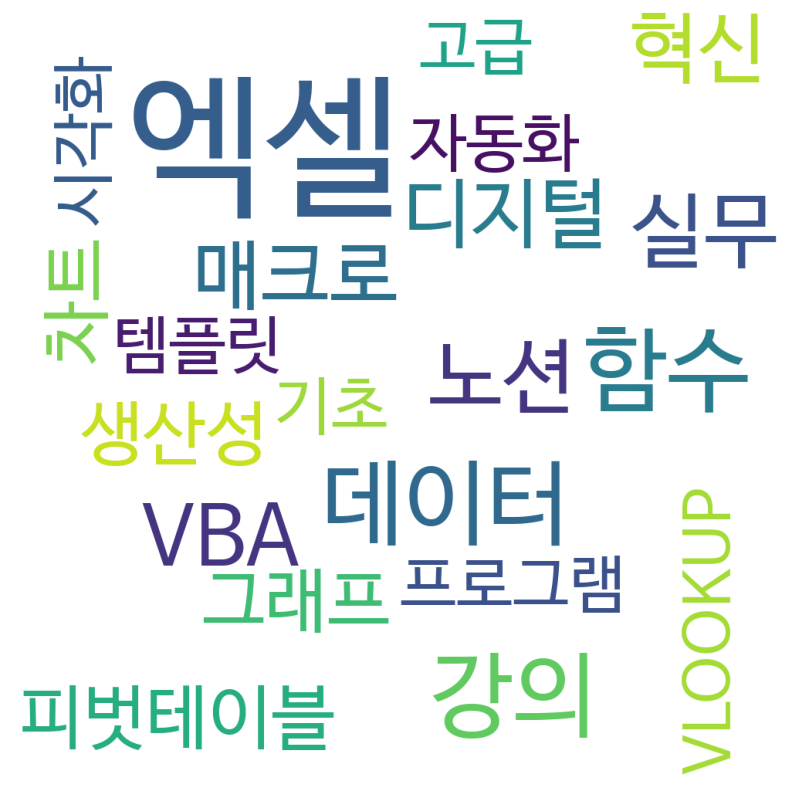

Topic 1: [('indexmatch', 1.13), ('Í∏∞Îä•', 1.06), ('ÌîÑÎ°úÍ∑∏Îû®', 1.05), ('Ï°∞Í±¥Î∂Ä', 1.05), ('Î∂ÑÏÑù', 1.04)]
Topic 2: [('ÌïÑÏàò', 1.13), ('Îã®Ï∂ï', 1.03), ('Í∞ÄÍ≥µ', 1.02), ('ÏÉùÏÇ∞ÏÑ±', 1.01), ('ÌÖúÌîåÎ¶ø', 1.01)]
Topic 3: [('ÏóëÏÖÄ', 1.2), ('ÏóÖÎ¨¥', 1.2), ('Ï∞®Ìä∏', 1.13), ('Í∞ïÏ¢å', 1.04), ('ÍµêÏû¨', 1.02)]
Topic 4: [('ÎîîÏßÄÌÑ∏', 1.13), ('Í≥ÑÏÇ∞', 1.09), ('Í∞ÄÍ≥ÑÎ∂Ä', 1.06), ('ÎßéÏùÑ', 1.02), ('Ï°∞Í±¥', 1.02)]
Topic 5: [('ÎßéÏùÑ', 1.23), ('Ï¥àÎ≥¥Ïûê', 1.17), ('msÏóëÏÖÄ', 1.13), ('ÏùºÏùº', 1.07), ('ÏãúÍ∞ÅÌôî', 1.06)]
Topic 6: [('ÌîºÎ≤óÌÖåÏù¥Î∏î', 1.09), ('ÏóëÏÖÄ', 1.06), ('Îã®Ï∂ï', 1.04), ('excel4macro', 1.02), ('Ïª§ÎÆ§ÎãàÌã∞', 1.01)]
Topic 7: [('Í∂åÌòÑÏö±', 1.07), ('ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç', 1.03), ('adodb', 1.03), ('creative', 1.01), ('ÏùëÏö©', 1.01)]
Topic 8: [('ÏÑ∏Î°úÎßâÎåÄ', 1.13), ('Í∞ÄÍ≥ÑÎ∂Ä', 1.07), ('ÌîºÎ≤óÌÖåÏù¥Î∏î', 1.03), ('Í∑∏ÎûòÌîÑ', 1.01), ('Ïä¨ÎùºÏù¥ÏÑú', 1.01)]
Topic 9: [('chart', 1.16), ('ÏßÑÌñâ', 1.15), ('db', 1.06), ('Ï∂îÏ∂ú', 1.05), ('ÎåÄÏãúÎ≥¥Îìú', 1.02)]
Topic 10

In [103]:
generate_word_cloud(filtered_df, 'key_words')

In [104]:
#Í∑∏Î£π3
filtered_df = df1[df1['cluster_label'] == 2]
filtered_df[['title', 'key_words', 'cluster_label']]

title  \
242           Ï†ïÎßê Ïâ¨Ïö¥ Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑùüìà Ïò§Î†åÏßÄ3üçä | full version | Î¨¥Î£åÍ∞ïÏùò   
243                        Orange Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑù - ÏãúÍ≥ÑÏó¥Î∂ÑÏÑù(ARIMA)   
244  [Orange] Ïù¥ÎØ∏ÏßÄ Î∂ÑÏÑù: ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ(Clustering)Í≥º Î∂ÑÎ•ò(Classif...   
245   [Orange3]Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑù,Î®∏Ïã†Îü¨Îãù_[3. Regression/ÏïÑÏù¥Ïò§ÏôÄ ÏßëÍ∞í ÏòàÏ∏°ÌïòÍ∏∞]   
246                       [STEP] OrangeÎ•º ÌôúÏö©Ìïú Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù   
247          [ExcelÍ≥º Orange] Sentiment Analysis(Í∞êÏÑ± Î∂ÑÏÑù)   
248                     Orange3 Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(30/36) - ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò   
249                   [ÏóëÏÖà Ïõ®ÎπÑÎÇò] Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÌîåÎû´Ìèº 'KNIME' (1Í∞ï)   
250            [Ï†úÌíà ÏÜåÍ∞ú] Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÌÜµÌï© Î∂ÑÏÑù ÏÜåÌîÑÌä∏Ïõ®Ïñ¥ KNIME(ÎÇòÏûÑ)   
251  ÔøΩÔøΩÏòÅÏÉÅ ÌïòÎÇòÎ°ú KNIME ÏÇ¨Ïö©Î≤ï ÏôÑÎ≤Ω Ï†ïÎ¶¨üî• ÎÇòÏûÑÏùÑ ÌôúÏö©Ìïú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ï [...   
252      [KNIME Ïã§Ïäµ] Ïó∞Í¥ÄÏÑ±Î∂ÑÏÑù(Association Analysis) - Í∑úÏπôÎ∂ÑÏÑù   
253   [KNIME Ïã§Ïäµ] Ïó∞Í¥ÄÏÑ±Î∂ÑÏÑù(Association Analysis) - Í∏∞ÎåÄÏàòÏùµ Í≥ÑÏÇ∞   
254  [KNIMEÏùÑ ÌÜµÌïú Îî•Îü¨Îãù Î∂ÑÏÑù] AutoencoderÎ•º ÌôúÏö©ÌïòÏó¨ Ïã†Ïö©Ïπ¥Îìú ÏÇ¨Í∏∞Í±∞Îûò ÌÉêÏßÄ   
255              [KNIME Ïã§Ïäµ] ÌöåÍ∑Ä(Regression) - Î™®Îç∏ÌïôÏäµ Î∞è ÏòàÏ∏°   
256  [KNIME Ïã§Ïäµ] ÏõπÌÅ¨Î°§ÎßÅ(Web Crawling) - HTML Î∂ÑÏÑù & colu...   
257                                KNIMEÏùÑ ÌôúÏö©Ìïú Ï§ëÍ≥†Ï∞® ÏòàÏ∏°Î™®Îç∏   
258             [KNIME Ïã§Ïäµ] Íµ∞ÏßëÌôî(Clustering) - Îç∞Ïù¥ÌÑ∞ ÏßëÎã® Ìï¥ÏÑù   
259            10Î∂ÑÏúºÎ°ú ÏïåÏïÑÎ≥¥Îäî ÎπÖÎç∞Ïù¥ÌÑ∞ Í∏∞Ïà† & ÏÇ¨Î°ÄÎì§! | Ïã≠Î∂ÑAI ÎßàÏßÄÎßâ Í∞ïÏùò   
261                       [STEP] ÏÇ¨Î°ÄÎ•º ÌÜµÌïú ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (Î¨¥Î£åÍ∞ïÏùò)   
262  ÏóëÏÖÄÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Î°ú Ïñ∏Ï†ú ÎÑòÏñ¥Í∞ÄÏïº ÌïòÎÇòÏöî? - 5Í∞ÄÏßÄ ÌïµÏã¨ ÏöîÏïΩ | ÏóëÏÖÄ Í∏∞Ï¥à ...   
265             Îç∞Ïù¥ÌÑ∞ÌÖåÏù¥Î∏î ÏÑ§Í≥ÑÏùò Ï§ëÏöîÏÑ±(ÏÇ¨Ïã§ ÌòÑÏóÖÏù∏Îì§ÎèÑ Î™®Î•¥Îäî ÏÇ¨ÎûåÏù¥ ÎßéÏùå...)   
267                           Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ 19. ERD Ïó∞Ïäµ - Ïπ¥Ïπ¥Ïò§ÌÜ°   
270                                     Í≤åÏãúÌåê ERD Í∑∏Î¶¨Í∏∞ ‚úçüèª   
275                      [Îß§ÏÜåÎìú ÌäπÍ∞ï] Í≥†Í∞ù DB ÌôïÎ≥¥ Î∞è Í¥ÄÎ¶¨ Î∞©Î≤ï (1)   
277  Í∞úÎ∞ú ÌïÑÏàò ÏßÄÏãù Îç∞Ïù¥ÌÑ∞ Î≤†Ïù¥Ïä§ DB SQL Ïù¥ ÏòÅÏÉÅÎßå Î≥¥ÏÖîÎèÑ Í∞úÎÖêÏù¥Ìï¥ ÎêòÏã≠ÎãàÎã§. ÎÅù...   
278            ÎπÑÏ†ÑÍ≥µÏûêÎ•º ÏúÑÌïú SQL ÏûÖÎ¨∏ÏÑú! | ÏâΩÍ≤å Î∞∞Ïö∞Îäî SQL! | ÏóêÏñ¥ÌÅ¥ÎûòÏä§   
279  ÎπÑÏãº Greenhouse, Workable ÎåÄÏã†, Î¨¥Î£å ÏßÄÏõêÏûê Í¥ÄÎ¶¨ ÏãúÏä§ÌÖú (ATS...   
283                      [30Ï¥àÏÇ¨Ïö©Î≤ï] Bigquery ÌîºÎ¥á ÌÖåÏù¥Î∏î ÏÇ¨Ïö©ÌïòÍ∏∞   
284            BigQuery ÏãúÏûëÌïòÍ∏∞ 1Í∞ï - Introduction | TÏïÑÏπ¥Îç∞ÎØ∏   
285                Îç∞Ïù¥ÌÑ∞ Ïõ®Ïñ¥ÌïòÏö∞Ïä§ ÎÅùÌåêÏôï BigQuery Ïñ¥ÎîîÍπåÏßÄ ÏïåÍ≥† Í≥ÑÏã†Í∞ÄÏöî   
289  MSÏóëÏÖÄ Î∞∞ÏõåÏïº ÌïúÎã§Î©¥ Ïï°ÏÖÄ ÏÇ¨Ïö©Ïóê Íº≠ ÌïÑÏöîÌïú 10Í∞ÄÏßÄ Í∏∞Îä• ÎßùÏÑ§Ïù¥ÏßÄ ÎßêÍ≥† ÏßÄÍ∏à Î∞î...   
298  Ï∞ê Ï¥àÎ≥¥Î•º ÏúÑÌïú ÏóëÏÖÄ ÌîÑÎ°úÍ∑∏Îû® Í∏∞Ï¥àÎ∂ÄÌÑ∞ Ïã§Î¨¥ÍπåÏßÄ Î∞∞Ïö∞Í∏∞(Microsoft Excel...   
309                 Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Data Visualization ÏùÄ Î¨¥ÏóáÏù∏Í∞Ä?   
310                         ÏùºÏûòÎü¨Îì§ÎèÑ ÏùòÏô∏Î°ú Ïûò Î™®Î•¥Îäî Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ÏõêÏπô   
311                                   ÌÉúÎ∏îÎ°ú Í∏∞Ï¥à 30Î∂Ñ ÏôÑÏ†Ñ Ï†ïÎ≥µ   
312  [ÌÉúÎ∏îÎ°ú ÏãúÏûë] 1. ÌÉúÎ∏îÎ°ú ÏÑ§ÏπòÌïòÎäî Î≤ï | ÌÉúÎ∏îÎ°ú Í∏∞Ï¥à | ÌÉúÎ∏îÎ°ú Í∞ïÏùò | Îç∞Ïù¥ÌÑ∞...   
313                   ÔøΩÔøΩ ÌòÑÏóÖ Îç∞Ïù¥ÌÑ∞ ÏóîÏßÄÎãàÏñ¥ÏóêÍ≤å Î∞∞Ïö∞Îäî ÌÉúÎ∏îÎ°ú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî   
314  [ÏÖîÎãàÏùò 5Î∂Ñ ÌÉúÎ∏îÎ°ú] ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Îßµ ÏãúÍ∞ÅÌôî 5Î∂ÑÎßåÏóê ÎöùÎî±! (Îßµ ÏõêÎ≥∏ + ÌÉúÎ∏î...   
315  [ÏÖîÎãàÏùò 5Î∂Ñ ÌÉúÎ∏îÎ°ú] Í≥µÍ≥µÎπÖÎç∞Ïù¥ÌÑ∞ Í≥µÎ™®Ï†Ñ ÌñâÏïàÎ∂Ä Ïû•Í¥ÄÏÉÅ ÎåÄÏãúÎ≥¥Îìú ÌäúÌÜ†Î¶¨Ïñº! (Îç∞Ïù¥...   
320                     MSÍ∞Ä ÏûëÏ†ïÌïòÍ≥† ÎßåÎì† Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Ìà¥ Power BI   
321        Power BIÎ°ú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú(Word Cloud) ÎßåÎìúÎäî Î≤ï | ÎÑ§Ïù¥Î≤ÑÌÇ§ÏõåÎìú   
326  Í≥†Í∞ùÍ¥ÄÎ¶¨(1) Í≥†Í∞ùDB H.P/Email DATA Í¥ÄÎ¶¨Ïã§Ï†úÎπÑÎ≤ï 15ÎßåÏõê DataÍ¥ÄÎ¶¨...   
328                          Í≥†Í∞ùÍ¥ÄÎ¶¨(2) Ìï©Î≤ïÏ†Å ÌÉÄÍ≤ü Í≥†Í∞ùDB ÏàòÏßë Î∞©Î≤ï   
332  Îî•Îü¨Îã

In [105]:
generate_word_cloud(filtered_df, 'key_words')

Topic 1: [('ÌïÑÌÑ∞ÎßÅ', 1.13), ('ÌÅ¥ÎùºÏö∞Îìú', 1.1), ('knime', 1.07), ('Îç∞Ïù¥ÌÑ∞', 1.06), ('ÏïÑÌÇ§ÌÖçÏ≥ê', 1.06)]
Topic 2: [('Í∑∏Î£πÎ≥Ñ', 1.17), ('ÏãúÍ∞ÅÌôî', 1.12), ('ÏàúÏÑú', 1.09), ('ÏÑúÏãùÏûëÏÑ±', 1.06), ('Ïò®ÎùºÏù∏', 1.06)]
Topic 3: [('python', 1.31), ('ÎèÑÏ∂ú', 1.18), ('ÏãúÍ∞ÅÌôî', 1.13), ('Í∏∞ÎåÄÏàòÏùµ', 1.07), ('airtable', 1.07)]
Topic 4: [('Ïù∏Í≥µÏßÄÎä•', 1.1), ('ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç', 1.1), ('ÌöåÍ∑ÄÎ™®Îç∏', 1.09), ('ÏßÄÏõêÏûê', 1.08), ('ÌïÑÌÑ∞ÎßÅ', 1.06)]
Topic 5: [('Í∏∞Ïà†', 1.2), ('Î∂ÑÏÑù', 1.14), ('Ìï®Ïàò', 1.07), ('ÏÑúÏãùÍ∏∞Îä•', 1.07), ('Ï∞®Ìä∏', 1.06)]
Topic 6: [('Ìï©Î≤ïÏ†Å', 1.05), ('Í∞ÄÍ≤©', 1.04), ('Í∏àÏ†ÑÏ∂úÎÇ©Î∂Ä', 1.04), ('Ïó≠Ìï†', 1.01), ('ÎØ∏ÎîîÏñ¥', 1.01)]
Topic 7: [('ÏïåÍ≥†Î¶¨Ï¶ò', 1.1), ('ÎßàÏºÄÌåÖ', 1.04), ('ÏàòÏ†ï', 1.03), ('ÏÑúÏãùÍ∏∞Îä•', 1.03), ('ÏûÖÎ†•', 1.03)]
Topic 8: [('Îç∞Ïù¥ÌÑ∞', 1.43), ('erd', 1.12), ('Í¥ÄÎ¶¨', 1.11), ('ÎèÑÍµ¨', 1.09), ('Î°úÏßÄÏä§Ìã±', 1.06)]
Topic 9: [('ÏÑúÏãùÍ∏∞Îä•', 1.07), ('Í∏∞ÎåÄÏàòÏùµ', 1.05), ('kaggle', 1.04), ('Ï§ëÍ≥†Ï∞®', 1.0